# MVP: Machine Learning Algorithm to predict Car's Price

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

## Import Data

In [2]:
root = '../data/cleaned_cars.csv'

In [3]:
df = pd.read_csv(root)
df.head()

title       brand     model    type  year  \
0  Smart Fortwo Cabrio 52 Mhd Pure Aut.       SMART    FORTWO  sports  2014   
1           Volkswagen Scirocco 2.0 Tsi  VOLKSWAGEN  SCIROCCO  sports  2009   
2          Bmw Serie 2 218da Gran Coupé         BMW   SERIE 2  sports  2021   
3                     Bmw X4 Xdrive 20d         BMW        X4  sports  2017   
4                    Dodge Viper Srt-10       DODGE     VIPER  sports  2005   

     kms       city    gearbox  doors  seats  ...  height length  width  \
0  37125   Alicante  Automatic      2      2  ...     157    270    156   
1      0  Barcelona     Manual      3      4  ...     140    426    181   
2      0  Cantabria  Automatic      4      5  ...     142    453    180   
3  85000     Girona  Automatic      5      5  ...     162    467    188   
4  95017    Unknown  Automatic      2      2  ...     123    446    191   

  trunk_vol max_speed mixed_cons weight  tank_vol   acc  price  
0       203       145        4.3    780        33  13.7   5500  
1       292       235        7.6   1373        55   7.2  10900  
2       430       222        4.2   1545        42   8.5  36100  
3       500       212        5.4   1740        67   8.0  28000  
4       344       189       21.0   1546        70   3.9  27990  

[5 rows x 27 columns]

## Data Visualization

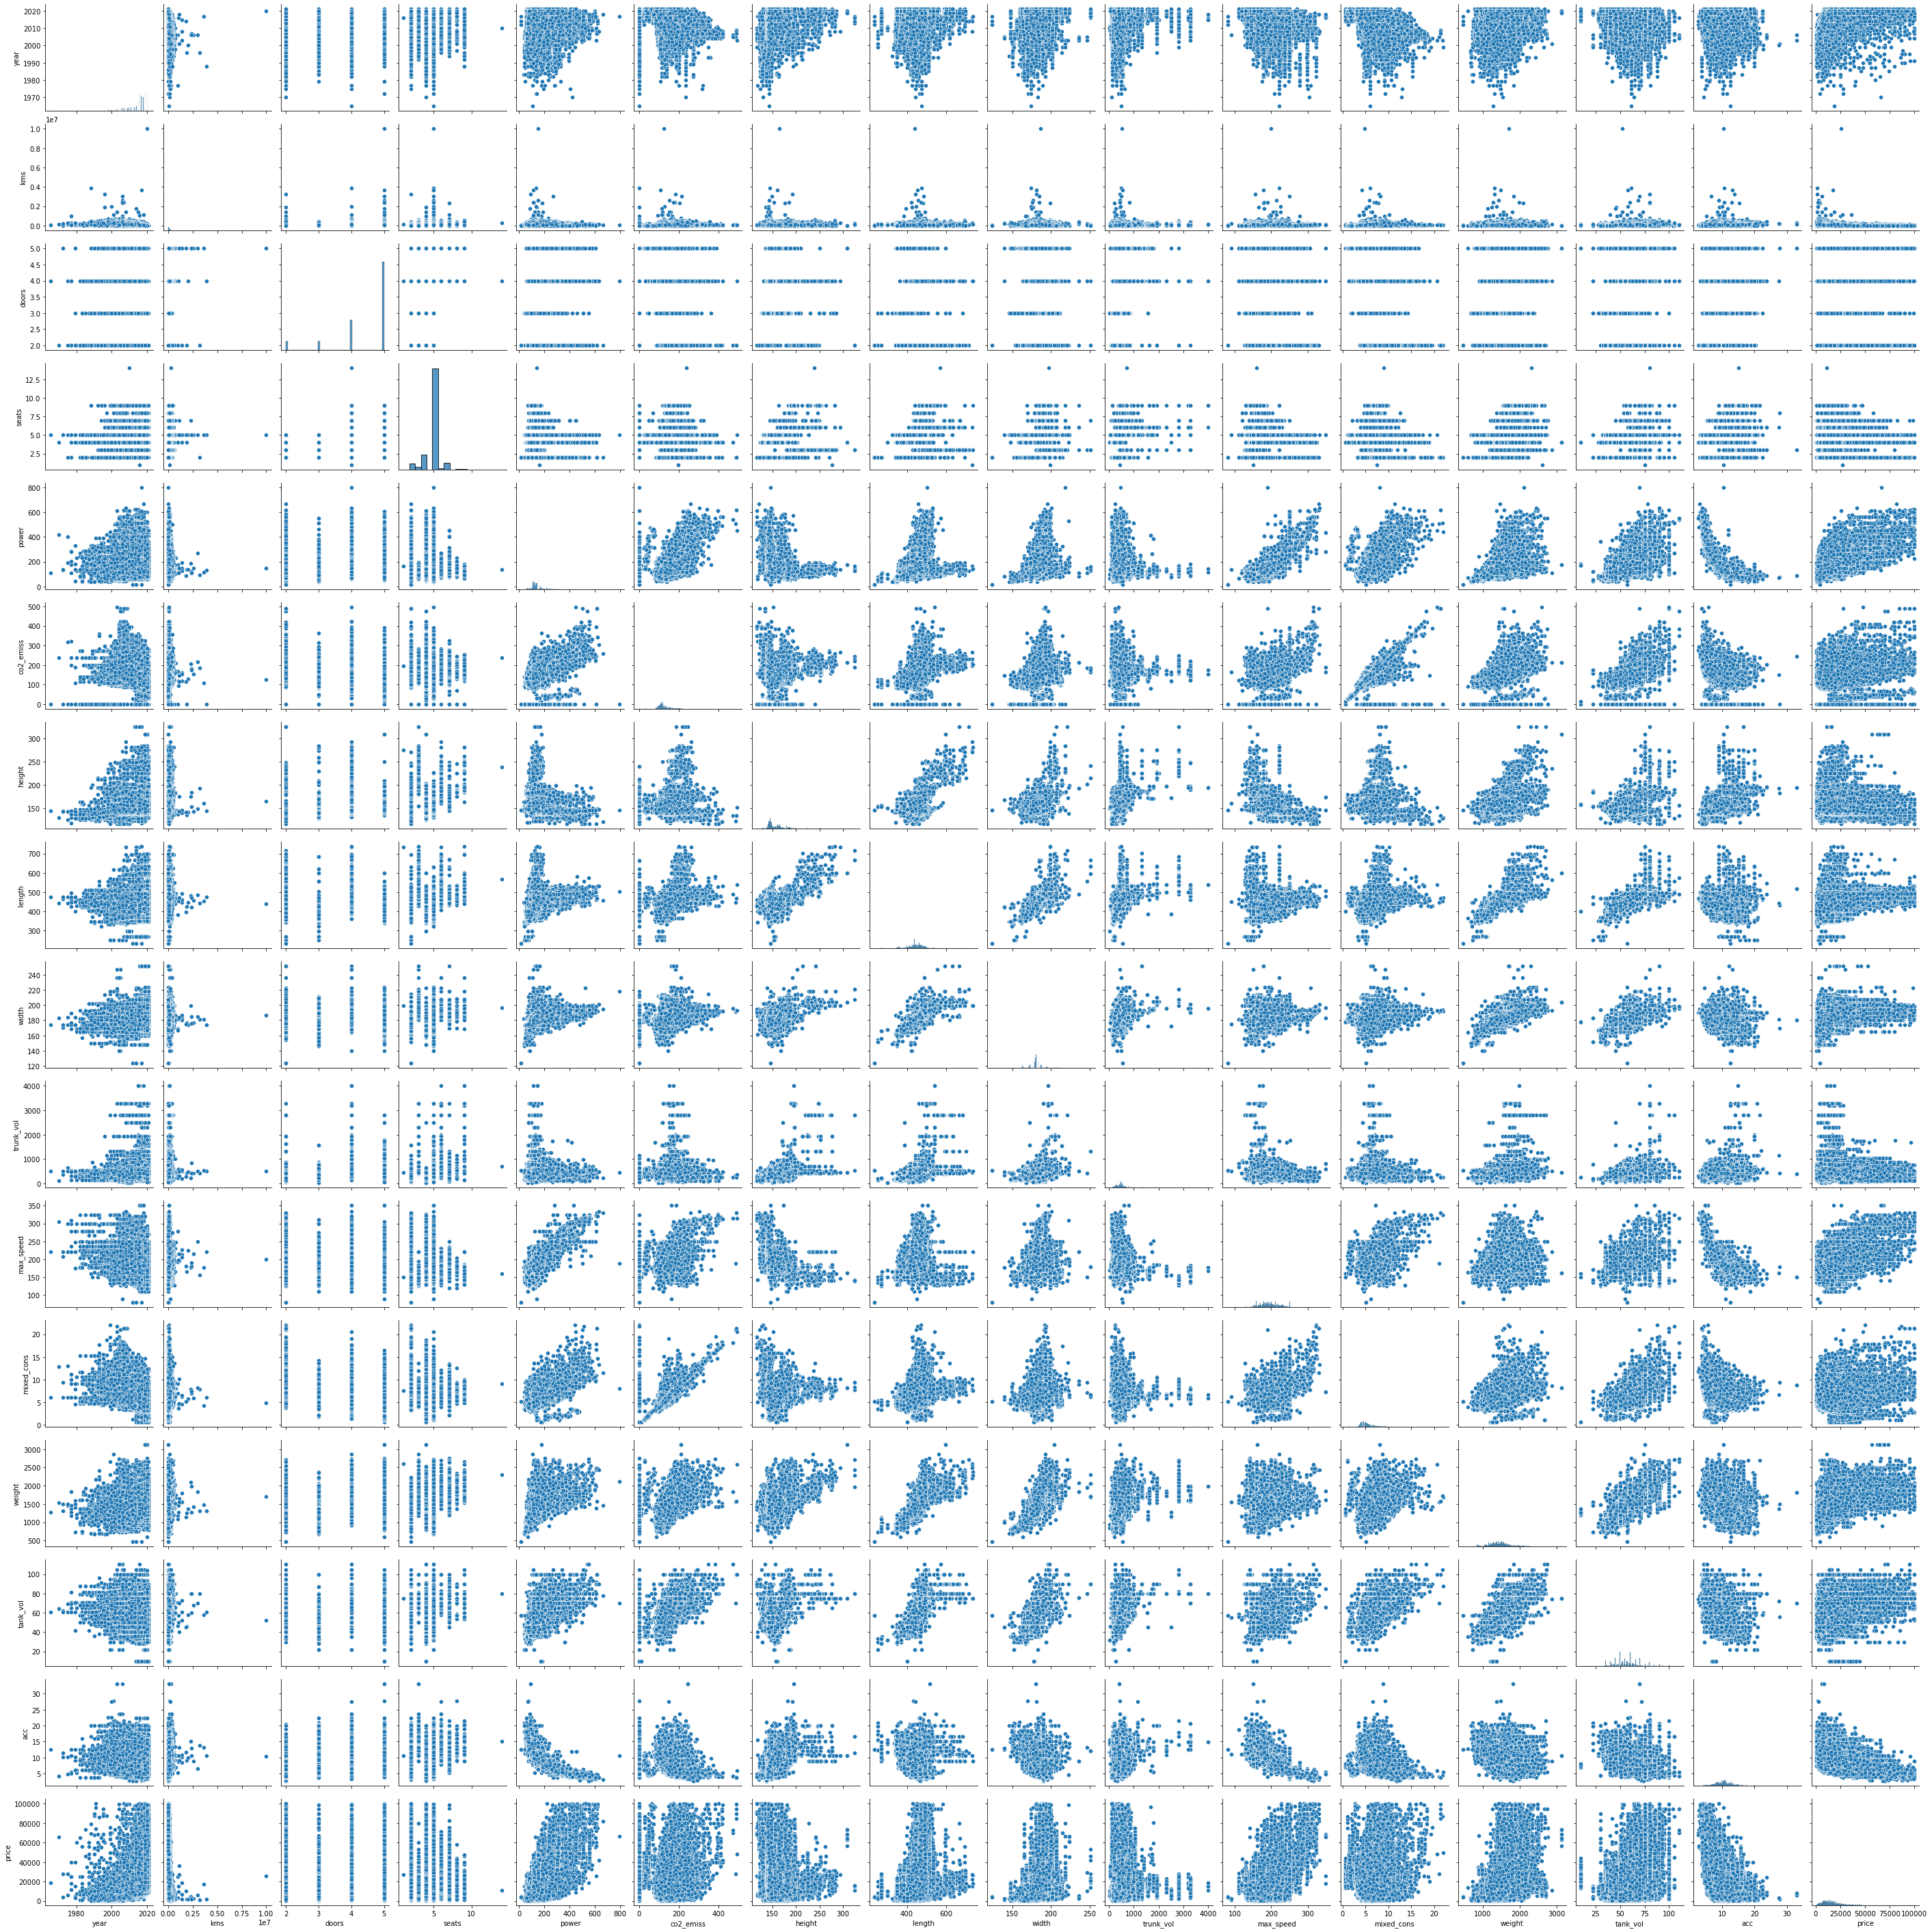

In [4]:
sns.pairplot(df)
plt.savefig('fig/06_pairplot.png')

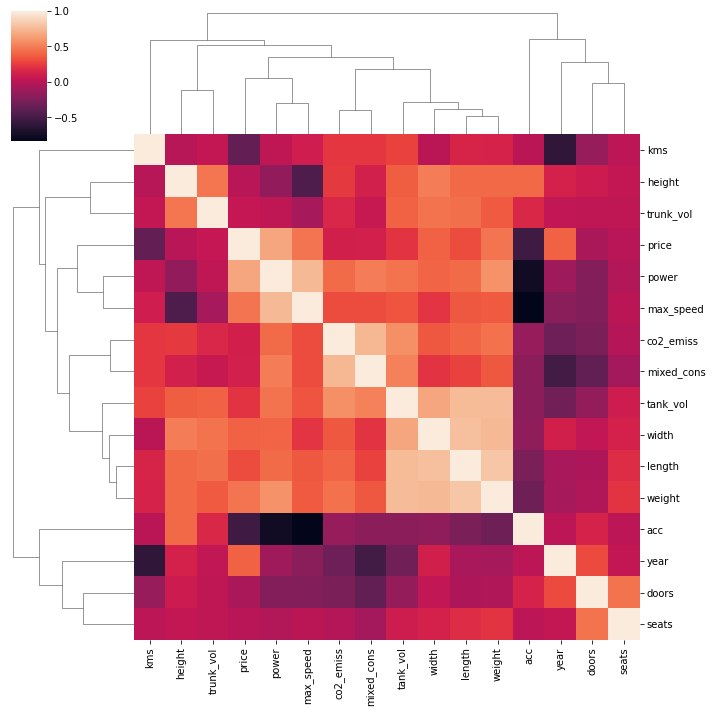

In [5]:
sns.clustermap(df.corr())
plt.savefig('fig/06_corr_matrix.png')

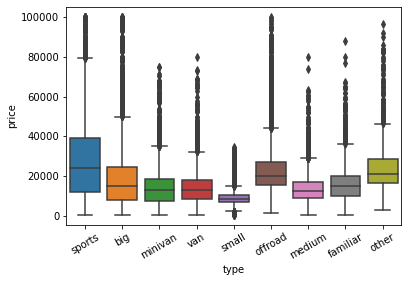

In [6]:
sns.boxplot(data=df, x='type', y='price')

plt.xticks(rotation=30)

plt.savefig('fig/06_prices_outlier.png')
plt.show()

We have detected a major outlier on the price that will be removed from the source

## Data Cleansing

In [7]:
import sys
sys.path.append('..')
from modules.car_cleanser import rm_outliers

In [8]:
df = rm_outliers(df)
df.price.max()

99990

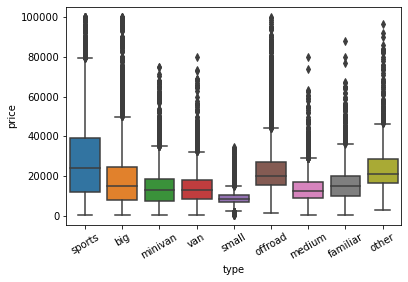

In [9]:
sns.boxplot(data=df, x='type', y='price')

plt.xticks(rotation=30)

plt.show()

## Data Modeling

### Price

In [10]:
# Dividing the data into target and features
features = df[df.select_dtypes('number').columns[:-1]]
target = df[df.columns[-1]]    # Price

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
predictions = lr.predict(X_test)

In [13]:
predictions

array([38194.88495716,  7101.98896571, 17622.85319911, ...,
       32581.58935876,  5545.7790037 , 13204.35721452])

### Type

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Dividing the data into target and features
features_t = df[df.select_dtypes('number').columns]
target_t = df['type']    # Type

In [16]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(features_t, target_t)

tree = DecisionTreeClassifier()
tree.fit(X_train_t, y_train_t)

DecisionTreeClassifier()

In [17]:
predictions_t = tree.predict(X_test_t)

In [18]:
predictions_t

array(['van', 'minivan', 'offroad', ..., 'medium', 'van', 'sports'],
      dtype=object)

## Model Evaluation

### Price

In [19]:
from modules.model_evaluator import eval_reg

In [20]:
eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.7214

RMSE = 6656.2017

MSE = 44305020.5829

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 4251.9963

EVS = 72.1375%



### Type
Multilabel classifier

In [21]:
from modules.model_evaluator import eval_cls

### MEASURES OF CLASSIFICATION MODEL ###
----------------------------------------

Accuracy score = 94.7258%

LogLoss cannot be applied to string.

Avg Precision score = 94.9784%

Recall score = 94.7258%

F1 score = 94.8426%

Confusion matrix:
[[2409    2    1    0    1    3    0    3    2]
 [  13  748    5    1    5    4    0    0    0]
 [   2    2 2270   12    5  117    1    1    2]
 [   0    0    6 1994   12    7    0    0   12]
 [   2    4    9   29 2167  172    0    3    1]
 [   0    3  114    3  125  152    0    0    1]
 [   0    0    0    0    0    0  687    0    0]
 [   2    1    3    1    4    1    2 1333    0]
 [   0    1    0   25    5    0    0    0 1351]]



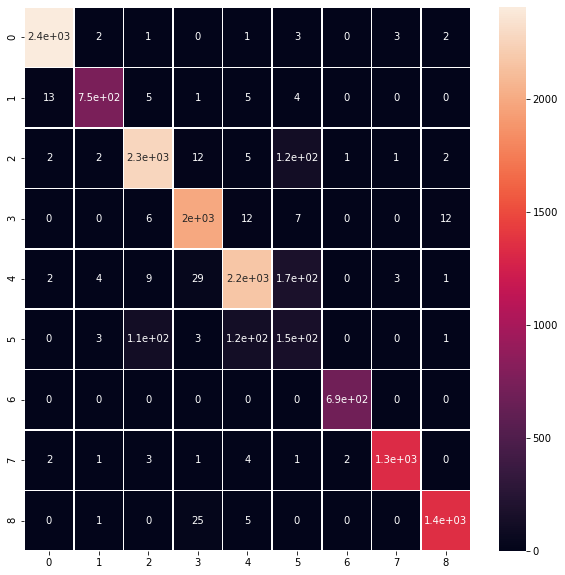

In [22]:
eval_cls(y_test_t, predictions_t)
plt.savefig('fig/06_confusion_matrix.png')